In [28]:
%matplotlib inline

import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from Utility import Database as db
from Utility import Tabulate

In [6]:
def plot_epochs_migration_rate_vs_fitness(problem_name, population_size):
    algorithms = [
        'Island GA Ring Lattice',
        'Island GA Cell',
        'Island GA Hierarchy',
        'Island GA Caveman',
        'Island GA Rewired Caveman',
        'Island GA Watts Strogatz',
        'Island GA Full'
    ]
    
    fig = plt.figure(figsize=(15,18))
    subplots = fig.subplots((len(algorithms)//2)+1, 2, subplot_kw=dict(projection='3d'),)
    subplots = [item for sublist in subplots for item in sublist]
    
    for i, alg_name in enumerate(algorithms):
        df = pd.DataFrame(columns=['Epoch', 'Migration Rate', 'Fitness'])
        
        configs = db.con.execute(f'''
            select * 
            from config 
            where 
                name="{problem_name}" and 
                population_size={population_size} and
                algorithm="{alg_name}"
        ''').fetchall()

        for unnamed_tuple in configs:
            c = db.Config(*unnamed_tuple)

            results = db.con.execute(f'''
                select *
                from result
                where
                    config_id={c.config_id}
                order by
                    order_index
            ''').fetchall()

            for unnamed_result in results:
                r = db.Result(*unnamed_result)

                df = df.append({
                    'Epoch': c.epochs_till_migration,
                    'Migration Rate': c.migration_rate,
                    'Fitness': r.fitness
                }, ignore_index=True)
        
        ax = subplots[i]
        
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MIgration Rate')
        ax.set_zlabel('Fitness')
        ax.set_title(alg_name)

        ax.plot_trisurf(df['Epoch'], df['Migration Rate'], df['Fitness'])
    plt.show()

In [81]:
def get_best_results(problem_name, population_size):
    algorithms = [
        'Island GA Ring Lattice',
        'Island GA Cell',
        'Island GA Hierarchy',
        'Island GA Caveman',
        'Island GA Rewired Caveman',
        'Island GA Watts Strogatz',
        'Island GA Full'
    ]
    
    for i, alg_name in enumerate(algorithms):
        results = db.con.execute(f'''
            select 
                config.algorithm, 
                fitness,
                config.migration_rate,
                config.epochs_till_migration
            from 
                result
            inner join 
                config
            on 
                result.config_id == config.config_id
            where 
                name="{problem_name}" and 
                population_size={population_size}
            group by 
                config.algorithm
            having
                result.fitness == min(result.fitness)
            order by 
                result.fitness
        ''').fetchall()
        
    Tabulate.print_table([
            'Algorith', 
            'Fitness', 
            'Migration Rate', 
            'Epochs Per Migraiton'
        ],
        results)


## 21/10/05

In [82]:
get_best_results('Rastrigin', 640)

Algorith                      Fitness                Migration Rate     Epochs Per Migraiton     
Island GA Full                3.797806204723102      0.03               2                        
Island GA Watts Strogatz      6.307038603587561      0.01               2                        
Island GA Cell                8.372902776923484      0.03               2                        
Island GA Caveman             9.704951750689483      0.09               2                        
Island GA Rewired Caveman     10.723897649090746     0.19               2                        
Island GA Hierarchy           14.795598968767191     0.01               2                        
Island GA Ring Lattice        20.21260455374697      0.11               2                        
Island GA Empty               91.45033249121386      0.01               2                        


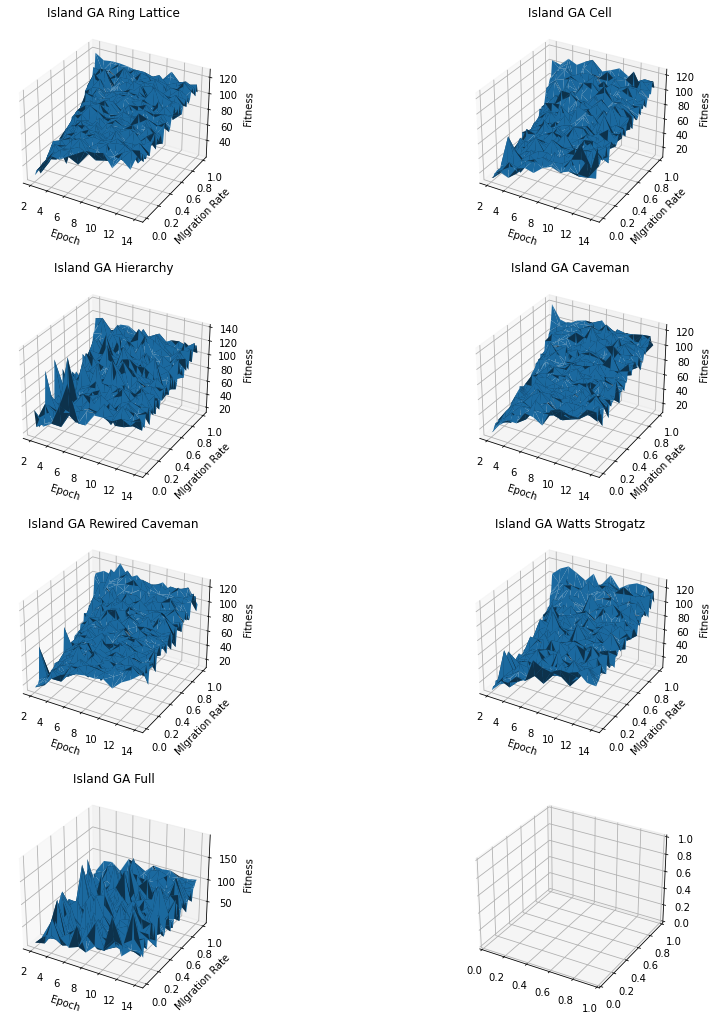

In [7]:
plot_epochs_migration_rate_vs_fitness('Rastrigin', 640)

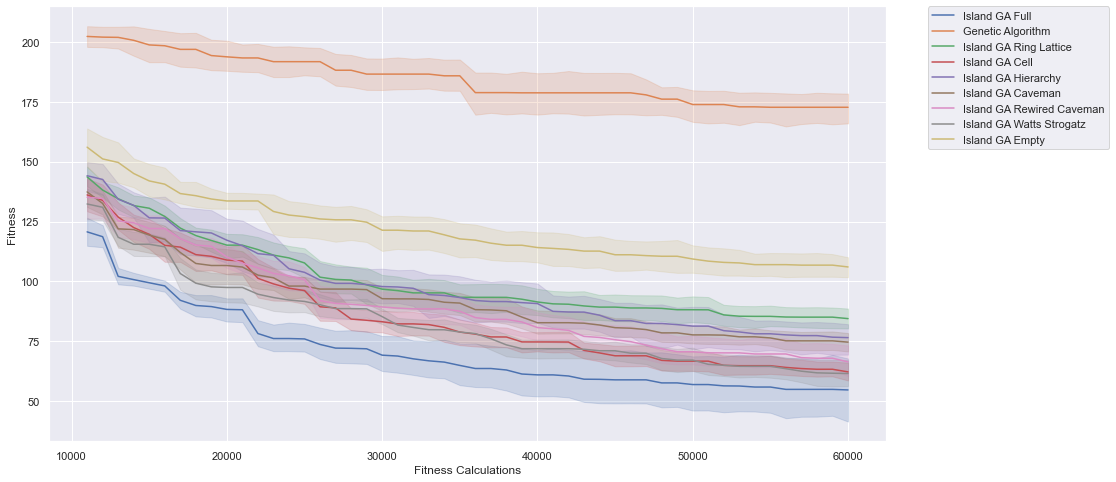

In [9]:
df = pd.DataFrame(columns=['Algorithm', 'Fitness Calculations', 'Epoch', 'Migration Rate', 'Fitness'])

configs = db.con.execute('''
    select * 
    from config 
    where 
        name="Rastrigin" and 
        population_size=640
''').fetchall()

for unnamed_tuple in configs:
    c = db.Config(*unnamed_tuple)
    if not 'G' in c.algorithm:
        continue

    results = db.con.execute(f'''
        select *
        from result
        where
            config_id={c.config_id}
        order by
            order_index
    ''').fetchall()

    for unnamed_result in results:
        r = db.Result(*unnamed_result)
        
        df = df.append({
            'Algorithm': c.algorithm,
            'Fitness Calculations': c.fitness_calculations,
            'Epoch': c.epochs_till_migration,
            'Migration Rate': c.migration_rate,
            'Fitness': r.fitness,
            
        }, ignore_index=True)


sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='Fitness Calculations', y='Fitness', hue='Algorithm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 21/09/29

In [83]:
get_best_results('TSP', 320)

Algorith                      Fitness     Migration Rate          Epochs Per Migraiton     
Island GA Full                11432.0     0.15000000000000002     2                        
Island GA Watts Strogatz      12591.0     0.03                    2                        
Island GA Caveman             12737.0     0.05                    2                        
Island GA Rewired Caveman     12836.0     0.03                    2                        
Island GA Cell                12851.0     0.06999999999999999     2                        
Simulated Annealing           13196.0     0.01                    1                        
Island GA Hierarchy           14235.0     0.06999999999999999     2                        
Island GA Ring Lattice        15714.0     0.03                    2                        
Island GA Empty               26449.0     0.01                    2                        
Genetic Algorithm             29154.0     0.01                    1             

Island GA Ring Lattice
Island GA Cell
Island GA Hierarchy
Island GA Caveman
Island GA Rewired Caveman
Island GA Watts Strogatz
Island GA Full


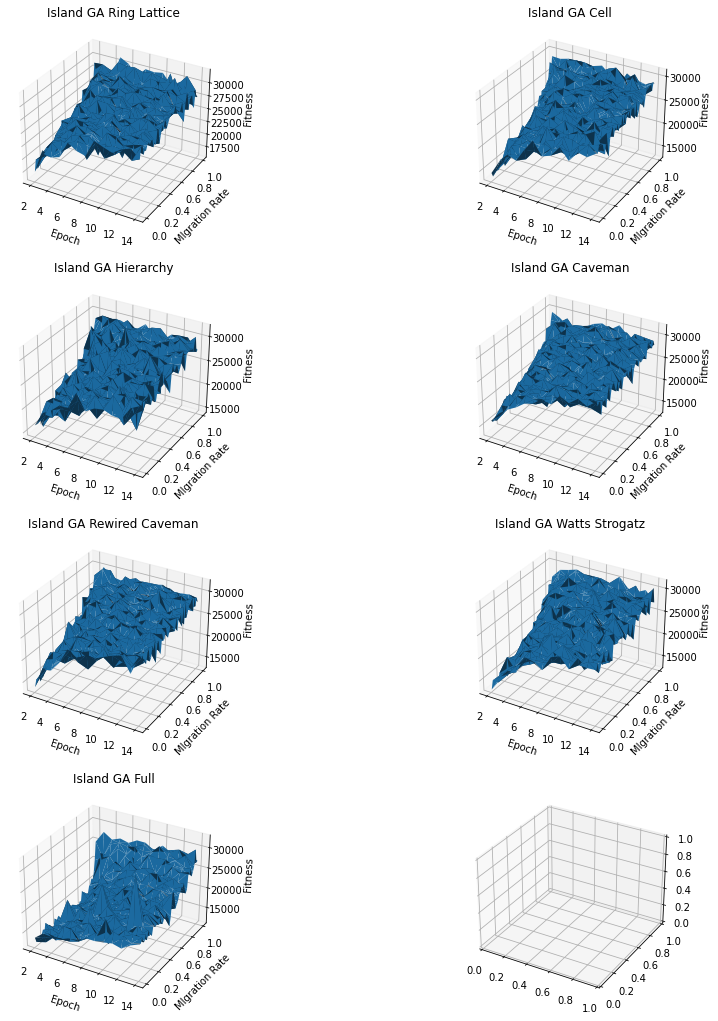

In [99]:
plot_epochs_migration_rate_vs_fitness('TSP', 320)